<a href="https://colab.research.google.com/github/CharalapML/ColabCode/blob/main/3D_Earthquake_clustering1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import  drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
#pip install git+https://github.com/renero/dataset

!pip3 install pydataset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939417 sha256=c4710b6f3d83f11c930ba942c40c8faa139d0159abf73953c51d24aaca9ed674
  Stored in directory: /root/.cache/pip/wheels/2b/83/5c/073c3755e8b7704e4677557b2055e61026c1a2342149214c13
Successfully built pydataset


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pydataset import data

#%matplotlib notebook

# from mpl_toolkits import mplot3d
# from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d


initiated datasets repo at: /root/.pydataset/


We're going to work with some pre-defined data sets originally used in R:

In [ ]:
# The following code exports the df file (all data) to a .csv file, which can then be imported to ExCel

df.to_csv('/drive/My Drive/CNN_TestData/df.csv')


In [ ]:
datasets = data()
print(datasets)

        dataset_id                                             title
0    AirPassengers       Monthly Airline Passenger Numbers 1949-1960
1          BJsales                 Sales Data with Leading Indicator
2              BOD                         Biochemical Oxygen Demand
3     Formaldehyde                     Determination of Formaldehyde
4     HairEyeColor         Hair and Eye Color of Statistics Students
..             ...                                               ...
752        VerbAgg                  Verbal Aggression item responses
753           cake                 Breakage Angle of Chocolate Cakes
754           cbpp                 Contagious bovine pleuropneumonia
755    grouseticks  Data on red grouse ticks from Elston et al. 2001
756     sleepstudy       Reaction times in a sleep deprivation study

[757 rows x 2 columns]


We'll use the 'quakes' dataset, what is it?  Read the documentation to find out:

In [ ]:
data('quakes', show_doc=True)
df = data('quakes')
#print(df)
type(df)
display (df)

quakes

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Locations of Earthquakes off Fiji

### Description

The data set give the locations of 1000 seismic events of MB > 4.0. The events
occurred in a cube near Fiji since 1964.

### Usage

    quakes

### Format

A data frame with 1000 observations on 5 variables.

[,1]

lat

numeric

Latitude of event

[,2]

long

numeric

Longitude

[,3]

depth

numeric

Depth (km)

[,4]

mag

numeric

Richter Magnitude

[,5]

stations

numeric

Number of stations reporting

### Details

There are two clear planes of seismic activity. One is a major plate junction;
the other is the Tonga trench off New Zealand. These data constitute a
subsample from a larger dataset of containing 5000 observations.

### Source

This is one of the Harvard PRIM-H project data sets. They in turn obtained it
from Dr. John Woodhouse, Dept. of Geophysics, Harvard University.

### Examples

    require(graphics)
    pairs(quakes, 

,lat,long,depth,mag,stations
1,-20.42,181.62,562,4.8,41
2,-20.62,181.03,650,4.2,15
3,-26.00,184.10,42,5.4,43
4,-17.97,181.66,626,4.1,19
5,-20.42,181.96,649,4.0,11
...,...,...,...,...,...
996,-25.93,179.54,470,4.4,22
997,-12.28,167.06,248,4.7,35
998,-20.13,184.20,244,4.5,34
999,-17.40,187.80,40,4.5,14


In [ ]:
display (df)

,lat,long,depth,mag,stations
1,-20.42,181.62,562,4.8,41
2,-20.62,181.03,650,4.2,15
3,-26.00,184.10,42,5.4,43
4,-17.97,181.66,626,4.1,19
5,-20.42,181.96,649,4.0,11
...,...,...,...,...,...
996,-25.93,179.54,470,4.4,22
997,-12.28,167.06,248,4.7,35
998,-20.13,184.20,244,4.5,34
999,-17.40,187.80,40,4.5,14


**Make a scatter plot of the latitudes and longitudes of the earthquakes**

In [ ]:
lat = df['lat']
print (lat)

1      -20.42
2      -20.62
3      -26.00
4      -17.97
5      -20.42
        ...  
996    -25.93
997    -12.28
998    -20.13
999    -17.40
1000   -21.59
Name: lat, Length: 1000, dtype: float64


In [ ]:
print ('df.max =', '\n', df.max(), '\n', '--------------' ,   'df.min =', '\n', df.min())

df.max = 
 lat         -10.72
long        188.13
depth       680.00
mag           6.40
stations    132.00
dtype: float64 
 -------------- df.min = 
 lat         -38.59
long        165.67
depth        40.00
mag           4.00
stations     10.00
dtype: float64


<Axes: xlabel='lat', ylabel='long'>

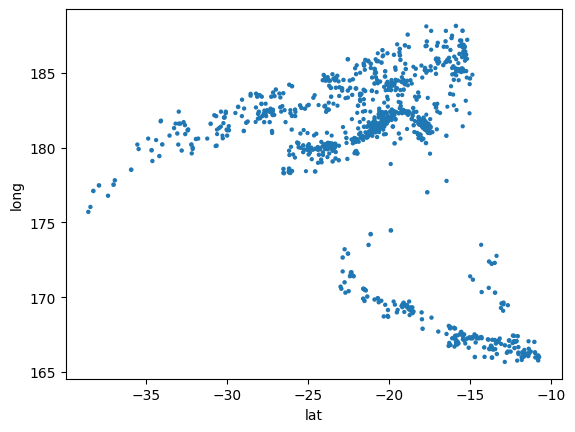

In [ ]:
df.plot.scatter(x = 'lat', y = 'long', s = df['mag'])

In [ ]:
maxmag = df['mag'].max()
print('maxmag' , maxmag)
minmag = df['mag'].min()
print('minmag' , minmag)

maxdep = df['depth'].max()
print('maxdep' , maxdep)
mindep = df['depth'].min()
print('mindep' , mindep)

maxmag 6.4
minmag 4.0
maxdep 680
mindep 40


**Now make another scatter plot showing the latitudes and longitudes, but with the marker size representing the magnitude and the colour representing the depth**  Hint - scale the magnitudes to 20*(mag - min_mag)/(max_mag-min_mag)

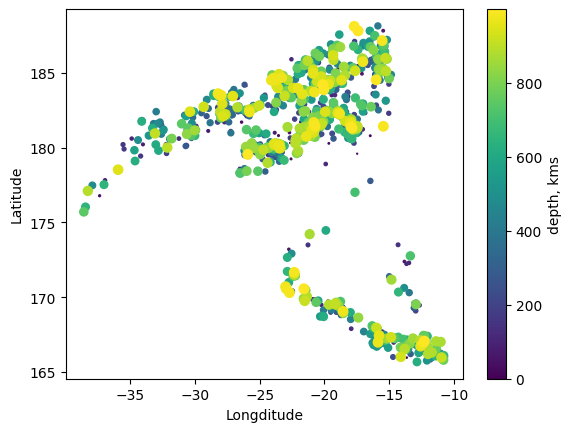

In [ ]:
#df.plot.scatter(x = 'lat', y = 'long', s = 10*(df['mag']/(df['mag'].max())  ))
lat = df['lat']
long = df['long']
depth = df['depth']
mag = df['mag']
stations = df['stations']
s = [0.3*mag/maxmag  for mag in range(len(mag))]
#c = [depth/maxdep  for depth in range(len(depth))]
c = [depth for depth in range(len(depth))]
plt.scatter(lat, long, s=s, c=c )
plt.colorbar(label = 'depth, kms')
plt.xlabel('Longditude', fontsize=10)
plt.ylabel('Latitude', fontsize=10)
plt.show()

What can you say about the depths of the earthquakes?

**Now use the KMeans algorithm from scikit learn to cluster the eartquake locations according to their latitude and longitude.  How many clusters are appropriate?  Hint - look at the documentation for the dataset!**

In [ ]:
from sklearn.cluster import KMeans

# The random_state needs to be the same number to get reproducible results
kmeans = KMeans(n_clusters=3) #, random_state=42)
y_km = kmeans.fit_predict(df[['lat', 'long']])
#kmeans.fit(df[['lat', 'long']])
#kmeans.labels_

#print (y_km)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Make a scatter plot showing the cluster each earthquake belongs to**

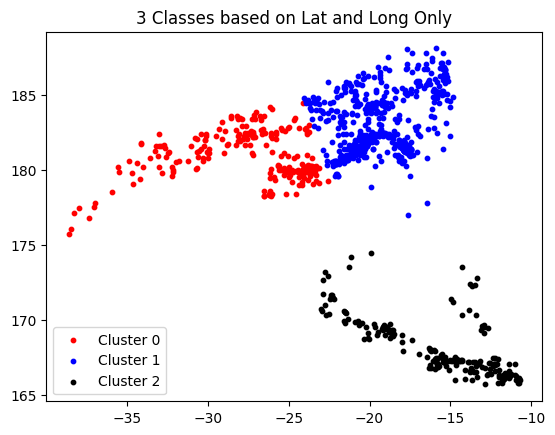

In [ ]:
plt.scatter(lat[y_km==0], long[y_km==0], s=10, c='red', label ='Cluster 0')
plt.scatter(lat[y_km==1], long[y_km==1], s=10, c='blue', label ='Cluster 1')
plt.scatter(lat[y_km==2], long[y_km==2], s=10, c='black', label ='Cluster 2')
plt.legend(loc = 'lower left')
plt.title('3 Classes based on Lat and Long Only')
plt.show()

**Now perform KMeans clustering on the latitude, longitude and depth without scaling the inputs.  Plot the resulting clusters.  What do you notice?**

In [ ]:
kmeans = KMeans(n_clusters=3) #, random_state=42)
y_km = kmeans.fit_predict(df[['lat', 'long', 'depth']])
#kmeans.fit(df[['lat', 'long']])
#kmeans.labels_
#print (y_km)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


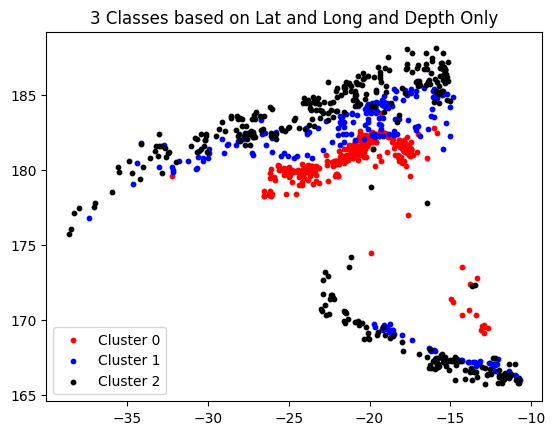

In [ ]:
plt.scatter(lat[y_km==0], long[y_km==0], s=10, c='red', label ='Cluster 0')
plt.scatter(lat[y_km==1], long[y_km==1], s=10, c='blue', label ='Cluster 1')
plt.scatter(lat[y_km==2], long[y_km==2], s=10, c='black', label ='Cluster 2')
plt.legend(loc = 'lower left')
plt.title('3 Classes based on Lat and Long and Depth Only')
plt.show()

**Now perform clustering on the same three variables but this time normalize them (tip - use normalize from sklearn.preprocessing with axis=0).  Plot your results as lat vs long, long vs depth and lat vs depth.  What do you notice?**

In [ ]:
from sklearn.preprocessing import Normalizer
normalizer_lat = Normalizer() #.fit(df)

#latNorm = normalizer.fit_transform(df[['lat']].values)
#longNorm = normalizer.transform(df[['long']])
#DpthNorm = normalizer.transform(df[['depth']])
#df[['lat']] = (df[['lat']] - df[['lat']].mean())/df[['lat']].std()
df[['latNorm']] = (df[['lat']] - df[['lat']].min())/(df[['lat']].max() - df[['lat']].min())
df[['longNorm']] = (df[['long']] - df[['long']].min())/(df[['long']].max() - df[['long']].min())
df[['dpthNorm']] = (df[['depth']] - df[['depth']].min())/(df[['depth']].max() - df[['depth']].min())
#print(df[['lat']])

<Axes: xlabel='latNorm', ylabel='longNorm'>

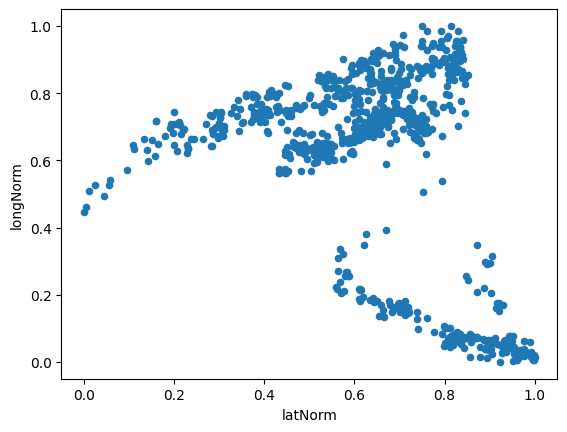

In [ ]:
df.plot.scatter(x = 'latNorm', y = 'longNorm')

<Axes: xlabel='latNorm', ylabel='dpthNorm'>

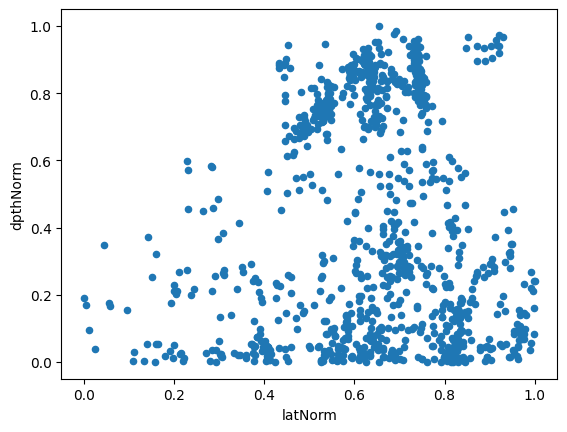

In [ ]:
df.plot.scatter(x = 'latNorm', y = 'dpthNorm')

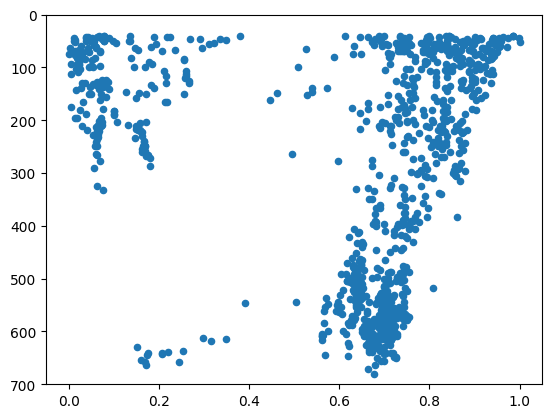

In [ ]:
plt.scatter(x = df['longNorm'], y = df['depth'], marker = 'o', s=20)                   #'dpthNorm')
plt.ylim(700,0)
plt.show()


In [ ]:
print(df)

        lat    long  depth  mag  stations   latNorm  longNorm  dpthNorm
1    -20.42  181.62    562  4.8        41  0.651956  0.710151  0.815625
2    -20.62  181.03    650  4.2        15  0.644779  0.683882  0.953125
3    -26.00  184.10     42  5.4        43  0.451740  0.820570  0.003125
4    -17.97  181.66    626  4.1        19  0.739864  0.711932  0.915625
5    -20.42  181.96    649  4.0        11  0.651956  0.725289  0.951562
...     ...     ...    ...  ...       ...       ...       ...       ...
996  -25.93  179.54    470  4.4        22  0.454252  0.617542  0.671875
997  -12.28  167.06    248  4.7        35  0.944026  0.061888  0.325000
998  -20.13  184.20    244  4.5        34  0.662361  0.825022  0.318750
999  -17.40  187.80     40  4.5        14  0.760316  0.985307  0.000000
1000 -21.59  170.56    165  6.0       119  0.609975  0.217720  0.195312

[1000 rows x 8 columns]


**Now make a scatter plot of the magnitutes against the number of stations.  Is there a correlation?  Does this make sense?**

<Axes: xlabel='stations', ylabel='mag'>

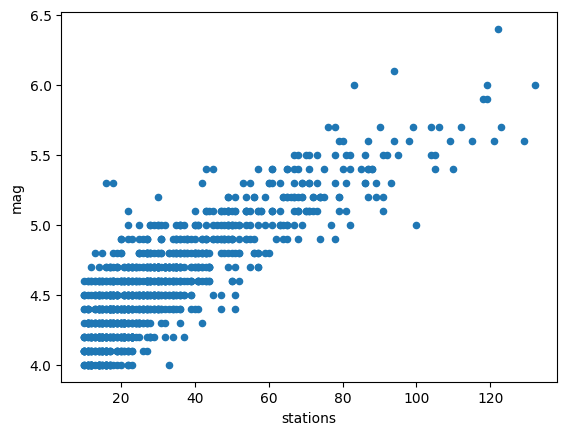

In [ ]:
df.plot.scatter(x = 'stations', y = 'mag')

In [ ]:
x,y,z = df['lat'], df['long'], df['depth']

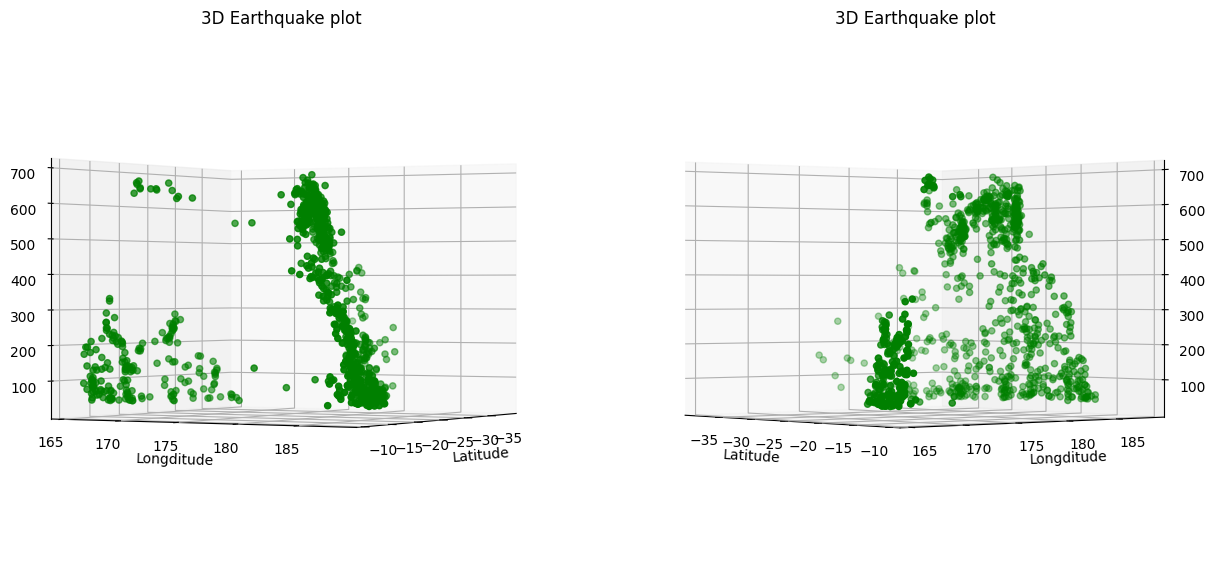

In [ ]:
fig = plt.figure(figsize = (15,15))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(1, 2, 1, projection='3d')

# load some test data for demonstration and plot a wireframe
ax.scatter3D(x, y, z, color = "green", marker  = 'o')
#ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)
ax.set_xlabel("Latitude")
ax.set_ylabel("Longditude")
ax.set_zlabel("Depth")
plt.title("3D Earthquake plot")
ax.view_init(0, 30)

#plt.show()

# # rotate the axes and update
# for angle in range(0, 360):
#     ax.view_init(30, angle)
#     plt.draw()
#     plt.pause(.001)

#fig = plt.figure(figsize = (8,8))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(1, 2, 2, projection='3d')

# load some test data for demonstration and plot a wireframe
ax.scatter3D(x, y, z, color = "green", marker  = 'o')
#ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)
ax.set_xlabel("Latitude")
ax.set_ylabel("Longditude")
ax.set_zlabel("Depth")
plt.title("3D Earthquake plot")
ax.view_init(0, -40)

plt.show()

In [ ]:
!pip install plotly

In [ ]:
df.head()

,lat,long,depth,mag,stations,latNorm,longNorm,dpthNorm
1,-20.42,181.62,562,4.8,41,0.651956,0.710151,0.815625
2,-20.62,181.03,650,4.2,15,0.644779,0.683882,0.953125
3,-26.00,184.10,42,5.4,43,0.451740,0.820570,0.003125
4,-17.97,181.66,626,4.1,19,0.739864,0.711932,0.915625
5,-20.42,181.96,649,4.0,11,0.651956,0.725289,0.951562


In [ ]:
import plotly.express as px
from plotly.express import scatter_3d
import plotly.graph_objs as go

import plotly.io as pio
plotly_template = pio.templates["plotly"]
plotly_template.layout


px.scatter_3d( data_frame= df, x=df['lat'], y=df['long'], z=df['depth'], color=df['mag'], symbol=None, size=df['mag'],
                          text=None, hover_name=None, hover_data=None, custom_data=None, error_x=None,
                          error_x_minus=None, error_y=None, error_y_minus=None, error_z=None, error_z_minus=None,
                          animation_frame=None, animation_group=None, category_orders=None, labels=None, size_max=None,
                          color_discrete_sequence=None, color_discrete_map=None, color_continuous_scale=px.colors.sequential.Rainbow, range_color=None,
                          color_continuous_midpoint=None, symbol_sequence=None, symbol_map=None, opacity=None, log_x=False, log_y=False, log_z=False,
                          range_x=None, range_y=None, range_z=None, title='3d View of Earthquakes', template=None, width=None, height=None)


#fig.show()
#fig.update_layout(legend_orientation="h",margin=dict(l=0, r=0, b=0, t=0))



In [ ]:
# import plotly.graph_objs as go

# trace1 = go.Scatter(
#     x=df['lat'],           # x-coordinates of trace
#     y=df['long'],          # y-coordinates of trace
#     mode='markers +text ',   # scatter mode (more in UG section 1)
#     text = False,
#     opacity = 1,
#     textposition='top center',

#     marker = dict(size = 12, color = color_4, symbol = marker_list_2, line=dict(width=0.5)),
#      textfont=dict(
#         color='black',
#         size=18, #can change the size of font here
#         family='Times New Roman'
#      )

#     )
# data = df['depth']

# layout = go.Layout(
#     autosize=False,
#     width=1000,
#     height=1000,

#     xaxis= go.layout.XAxis(linecolor = 'black',
#                           linewidth = 1,
#                           mirror = True),

#     yaxis= go.layout.YAxis(linecolor = 'black',
#                           linewidth = 1,
#                           mirror = True),

#     margin=go.layout.Margin(
#         l=50,
#         r=50,
#         b=100,
#         t=100,
#         pad = 4
#     )
# )

# fig = go.Figure(data=data, layout=layout)


In [ ]:
#%matplotlib notebook

**Now use a neural network with a linear output to predict the number of stations given an earthquake magnitude.  Hint - we did similar things in weeks 2 and 3!  Plot your results and the training history.**

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from sklearn.model_selection import train_test_split

# # If plots are not being outputted and Kernel quitting, try uncommenting the two lines below.
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [ ]:
df_Stn_Mag = df.drop(['lat', 'long', 'depth', 'latNorm', 'longNorm', 'dpthNorm'], axis=1)
#print(df_Stn_Mag.head(10))
Array_Stn_Mag = df_Stn_Mag.to_numpy()
#print (Array_Stn_Mag)

xmin = np.min([Array_Stn_Mag[:,0]],axis=1)
xmax = np.max([Array_Stn_Mag[:,0]],axis=1)
ymin = np.min([Array_Stn_Mag[:,1]],axis=1)
ymax = np.max([Array_Stn_Mag[:,1]],axis=1)

#print(Array_Stn_Mag[:,0])
print(xmin,xmax)
print(ymin,ymax)

X_train, X_test, y_train, y_test = train_test_split(Array_Stn_Mag[:, 0], Array_Stn_Mag[:, 1], test_size=0.2)

#print(X_train)
#print(y_train)

[4.] [6.4]
[10.] [132.]


In [ ]:
#
#   Training configuration
#
Nepochs         = 2000
learning_rate   = 0.05
Dropout = 30
BatchSize = 128
ValidationSplit = 30

#   Build the model
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Dense(1, activation='linear', input_shape=[1,]) )
#model.add( tf.keras.layers.Dense(1, activation='linear', input_shape=[1,]) )


# tf.keras.layers.Dropout(DropoutValue),
# tf.keras.layers.Dense(1)

#   Now specify the loss function - MSE
loss_fn = tf.keras.losses.MSE

#   Now we can train the model to make predictions.
#   Use the ADAM optimiser
#   Specify the metrics to report as accuracy
#   Specify the loss function (see above)
#   the fit step specifies the number of training epochs
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=opt, loss=loss_fn )

print("--------------------------------------------------------------------------------------------------------------")
print("\033[92mWill perform a linear regression optimisation\033[0m")
print("--------------------------------------------------------------------------------------------------------------\n\n")
print("Input data Linear Regression Data")
print("Nepochs              = ", Nepochs)
print("learning rate        = ", learning_rate)
print("Optimser             =  Adam")
print("Loss function        =  MSE")

history  = model.fit( X_train, y_train, epochs=Nepochs, batch_size=None )

#    Print out the history keys expected are:
#    loss        The loss function evaluated at each epoch for the training set
#    acc         The accuracy evaluated at each epoch for the training set
print("history keys = ", history.history.keys())

print("Display the evolution of the loss as a function of the training epoch")
print("  N(Epochs)                = ", Nepochs)
print("  Initial loss (train)     = {:5.4f}".format( history.history['loss'][0]) )
print("  Final loss (train)       = {:5.4f}".format( history.history['loss'][-1]) )

--------------------------------------------------------------------------------------------------------------
Will perform a linear regression optimisation
--------------------------------------------------------------------------------------------------------------


Input data Linear Regression Data
Nepochs              =  2000
learning rate        =  0.05
Optimser             =  Adam
Loss function        =  MSE
Epoch 1/2000
25/25 [==============================] - 0s 2ms/step - loss: 1051.4977
Epoch 2/2000
25/25 [==============================] - 0s 2ms/step - loss: 758.5023
Epoch 3/2000
25/25 [==============================] - 0s 2ms/step - loss: 569.5739
Epoch 4/2000
25/25 [==============================] - 0s 2ms/step - loss: 468.6473
Epoch 5/2000
25/25 [==============================] - 0s 2ms/step - loss: 414.7912
Epoch 6/2000
25/25 [==============================] - 0s 2ms/step - loss: 393.0350
Epoch 7/2000
25/25 [==============================] - 0s 2ms/step - loss: 383.4606

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________



Plotting the loss function evolution as a function of training epoch



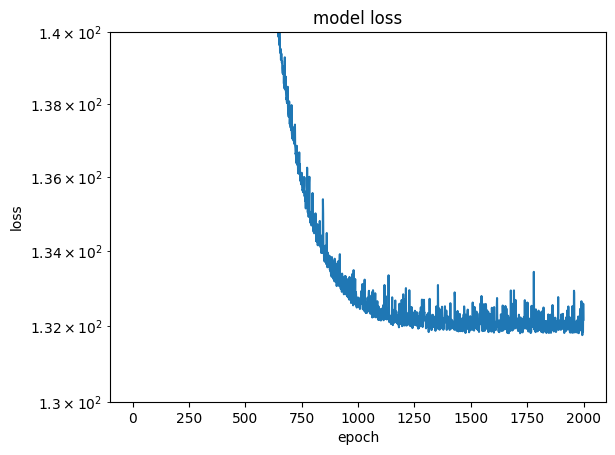

	m =  45.90203
	c =  -178.95406
	MSE loss = 
	Fitted line xrange = [array([4.]), array([6.4])], y range = [array([4.65406799]), array([114.81894226])]

Plotting the optimised model and test data



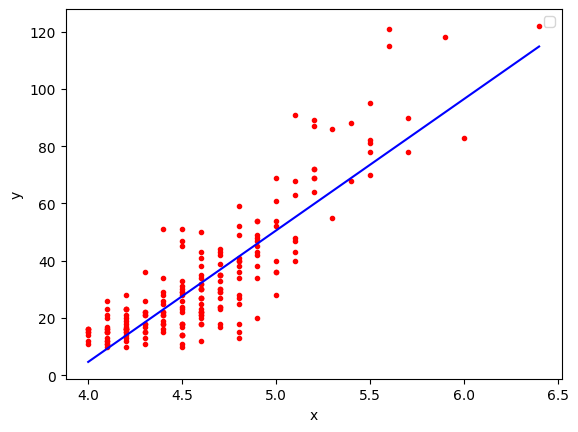

In [ ]:
# summarize history for loss
print("\n\033[1mPlotting the loss function evolution as a function of training epoch\033[0m\n")
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.ylim(130, 140)
plt.xlabel('epoch')
plt.yscale('log')
plt.show()
plt.clf()

# plot the model for the data
# we are interested in the first layer
layer = model.layers[0]
weights, biases = layer.get_weights()
ymin = weights[0][0]*xmin+biases[0]
ymax = weights[0][0]*xmax+biases[0]

print("\tm = ", weights[0][0])
print("\tc = ", biases[0])
print("\tMSE loss = ".format( history.history['loss'][-1]) )
print("\tFitted line xrange = {:}, y range = {:}".format([xmin, xmax], [ymin, ymax]))

print("\n\033[1mPlotting the optimised model and test data\033[0m\n")
plt.plot(X_test, y_test, "r.")
plt.plot([xmin, xmax], [ymin, ymax], "b-")  # plot the fitted line
plt.ylabel('y')
plt.xlabel('x')
plt.legend("test data", "fitted model")
plt.show()
